In [1]:
import nltk

from nltk.probability import FreqDist
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/bryson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/bryson/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/bryson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Common preprocessing tools

In [2]:
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [3]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [4]:
fdist = FreqDist(tokenized_word)

print(fdist)
print("2 most common :- ",fdist.most_common(2))

<FreqDist with 25 samples and 30 outcomes>
2 most common :-  [('is', 3), (',', 2)]


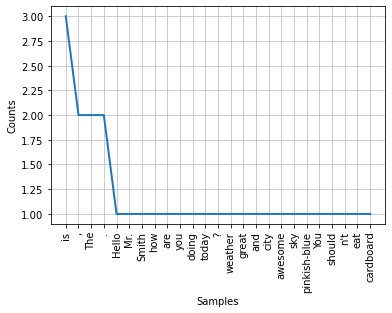

In [5]:
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

In [6]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'them', 'further', 'few', 'if', 'on', 'aren', 'all', 'before', 'below', 'm', "you're", 'we', 'those', 'you', 'are', 'did', 'doing', 'doesn', "should've", 'themselves', 'isn', 'any', 'had', 'herself', "haven't", 'didn', 'just', "weren't", 'our', 'same', 'their', 'he', 'there', 'being', "hadn't", 'yourself', 'above', 're', 'a', 'because', 'why', 'is', 'from', 'she', 'does', 'whom', 'again', 'then', 'own', "mustn't", 'so', 'through', 'each', 'most', 'only', 'ourselves', 'haven', 'between', 'ain', 'as', 'ours', 'other', 'd', 'which', "you've", "isn't", "wasn't", 'o', 'its', 'these', 'very', 'ma', 'weren', 'of', 'and', 'out', 'while', 'have', 'during', 'couldn', 'i', 'by', 'too', 'into', 'his', 'having', 'nor', 'an', 'under', "mightn't", 'hasn', 'they', 'this', "it's", 'about', 'your', "that'll", 'the', 've', "she's", 'both', 'more', 'now', "shan't", 'it', 'but', 'shan', 'not', 'some', 'than', 'be', 'how', 'been', 'at', 'myself', 'who', 'were', 'that', "aren't", 'needn', 'over', 'against',

In [7]:
text="""Hello Mr. Smith, how are you doing today?"""
tokenized_sent=word_tokenize(text)

filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']


In [8]:
# Stemming
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?']


In [9]:
#Lexicon Normalization
lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [10]:
# Sentence Tokenization
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)

# POS Tagging
nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# Classification : Multinomial Naive Bayes

In [11]:
data = pd.read_csv("train_data_polarity_test.csv")
data.shape

(24329, 8)

In [12]:
negative_reviews = data[data["polarity"] == -1]
neutral_reviews = data[data["polarity"] == 0]
positive_reviews = data[data["polarity"] == 1]

print(len(negative_reviews))
print(len(neutral_reviews))
print(len(positive_reviews))

6919
1103
16307


In [13]:
# balance positive and negative reviews
positive_reviews = positive_reviews.head(n=len(negative_reviews))
print(len(positive_reviews))

6919


In [14]:
train_data = pd.concat([negative_reviews, positive_reviews], ignore_index = True)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13838 entries, 0 to 13837
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        13838 non-null  object
 1   ratingScore        13838 non-null  int64 
 2   reviewTitle        13838 non-null  object
 3   reviewReaction     5456 non-null   object
 4   reviewDescription  13836 non-null  object
 5   isVerified         13838 non-null  bool  
 6   category           13838 non-null  object
 7   polarity           13838 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 770.4+ KB
None


In [15]:
print(train_data.polarity.value_counts())

-1    6919
 1    6919
Name: polarity, dtype: int64


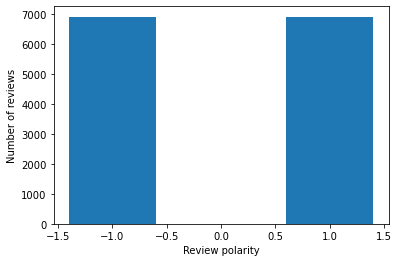

In [16]:
sentiment_count = train_data.groupby('polarity').count()
plt.bar(sentiment_count.index.values, sentiment_count['reviewDescription'])
plt.xlabel('Review polarity')
plt.ylabel('Number of reviews')
plt.show()

## Count Vectorizer

In [17]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(train_data['reviewDescription'].values.astype('U'))

In [18]:
print(text_counts.shape)
print(text_counts.toarray())

(13838, 24626)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, train_data['polarity'], test_size=0.1, random_state=1)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8952312138728323


## TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(train_data['reviewDescription'].values.astype('U'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, train_data['polarity'], test_size=0.1, random_state=1)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9234104046242775
